# Lebenszufriedenheit in verschiedenen Ländern
Gruppe: Laura Gjugja, Miriam Ilak de Brito, Miriam Fenollosa Muñoz

## 1. Fragestellungen und Datenbeschaffung
### 1.1 Titel: 
- Lebenszufriedenheit verschiedener Länder
### 1.2 Fragestellung:
- Wie unterscheidet sich die Lebenszufriedenheit zwischen den 5 besten und 5 schlechtesten abschneidenden Ländern in 2011 und 2024? 
- Wie unterscheiden sich die verschiedenen Kontinente?  
- Wie hat sich die Lebenszufriedenheit in der Schweiz verändert?
### 1.3 Datenquelle:
- https://ourworldindata.org/grapher/happiness-cantril-ladder?country=OWID_WRL~OWID_EUR~OWID_ASI~OWID_AFR

### 1.4 Daten beschaffen und laden

In [41]:
import pandas as pd

In [42]:
df = pd.read_csv("happiness-cantril-ladder.csv", skiprows=1,
                 names= ["Entity", "Code", "Year", "Cantril_ladder_score"])
df.head()

,Entity,Code,Year,Cantril_ladder_score
0,Afghanistan,AFG,2011,4.258
1,Afghanistan,AFG,2012,4.040
2,Afghanistan,AFG,2014,3.575
3,Afghanistan,AFG,2015,3.360
4,Afghanistan,AFG,2016,3.794


## 2. Daten vorbereiten 
- Die Roh-Daten sind bereits im Long-Format.
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert eine Region, die Zeilen sind die verschiedenen Jahre in aufsteigender Reihenfolge. In den Spalten steht die Lebenszufriedenheit ausgehend von einer Skala von 0 - 10.

In [43]:
df_pivot = df.pivot(index='Entity', columns='Year', values='Cantril_ladder_score')
df_pivot.head()

Year,2011,2012,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Entity,,,,,,,,,,,,,
Afghanistan,4.258000,4.040000,3.575000,3.360000,3.79400,3.632000,3.203000,2.566900,2.523000,2.404000,1.859000,1.721000,1.36400
Africa,4.453846,4.618466,4.476437,4.397037,4.46021,4.449756,4.517125,4.463035,4.553698,4.519978,4.428142,4.386864,4.39082
Albania,5.134000,5.550000,4.959000,4.655000,4.64400,4.586000,4.719000,4.882700,5.117000,5.199000,5.277000,5.304000,5.41100
Algeria,5.368000,5.422000,5.605000,6.355000,5.87200,5.295000,5.211000,5.005100,4.887000,5.122000,5.329000,5.364000,5.57100
Angola,4.178000,5.589000,4.033000,3.866000,3.79500,3.795000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Unsere Variable ist kontinuierlich. 
- Die Daten wurden im Zeitraum 2011 bis 2024 erhoben. 
- Die Lebenszufriedenheit liegt zwischen 1.364 und 7.856. 
- Es sind 178 Gebiete, 169 Codes und 13 Jahre. 
- Die Daten sind nicht komplett, gewisse Gebiete haben keine Daten.
- Insgesamt wurden während 13 Jahren 2112 Daten erhoben. 
- Die Länder mit den wenigsten Daten ist Guyana und Cuba.
- Maximal fehlten Daten aus 30 Ländern im Jahr 2022.
- Am wenigsten fehlten Daten aus 9 Ländern im Jahr 2014.

In [44]:
df.dtypes

Entity                   object
Code                     object
Year                      int64
Cantril_ladder_score    float64
dtype: object

### 3.1 Analyse Lebenszufriedenheit

In [46]:
df["Cantril_ladder_score"].describe()

count    2112.000000
mean        5.462898
std         1.115251
min         1.364000
25%         4.601250
50%         5.457100
75%         6.322500
max         7.856000
Name: Cantril_ladder_score, dtype: float64

In [162]:
df.describe()

,Year,Cantril_ladder_score
count,2112.000000,2112.000000
mean,2017.723011,5.462898
std,3.965923,1.115251
min,2011.000000,1.364000
25%,2015.000000,4.601250
50%,2018.000000,5.457100
75%,2021.000000,6.322500
max,2024.000000,7.856000


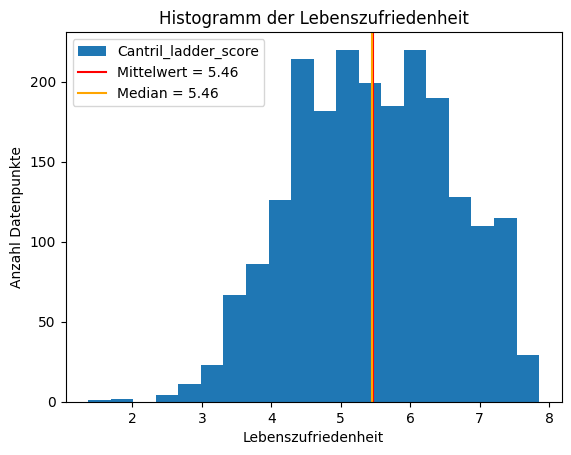

In [163]:
g = df['Cantril_ladder_score'].plot(kind='hist', bins=20, title='Histogramm der Lebenszufriedenheit', 
                           xlabel='Lebenszufriedenheit', ylabel='Anzahl Datenpunkte')
mean = df['Cantril_ladder_score'].mean()
g.axvline(x=df['Cantril_ladder_score'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Cantril_ladder_score'].median()
g.axvline(x=df['Cantril_ladder_score'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

### 3.2 Analyse Gebiete

In [47]:
df["Entity"].describe()

count            2112
unique            178
top       Afghanistan
freq               13
Name: Entity, dtype: object

In [154]:
# Anzahl Daten pro Land
df['Entity'].value_counts()

Entity
Afghanistan    13
Niger          13
Montenegro     13
Morocco        13
Myanmar        13
               ..
Oman            3
Puerto Rico     2
Maldives        2
Guyana          1
Cuba            1
Name: count, Length: 178, dtype: int64

In [ ]:
# Anzahl Länder pro Jahr ohne Daten
df_pivot.isna().sum()

Year
2011    11
2012    11
2014     9
2015    10
2016    12
2017    11
2018    11
2019    14
2020    18
2021    21
2022    30
2023    24
2024    20
dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Entity', ylabel='Anzahl Datenpunkte'>

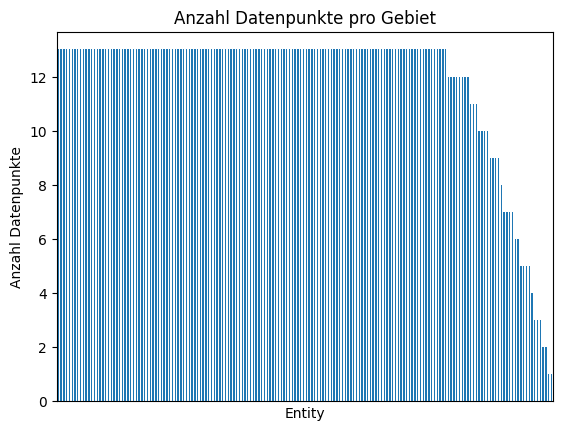

In [155]:
df['Entity'].value_counts().plot(kind='bar', 
                                 xticks=[],    
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

### 3.3 Analyse Jahre

In [150]:
df["Year"].describe()

count    2112.000000
mean     2017.723011
std         3.965923
min      2011.000000
25%      2015.000000
50%      2018.000000
75%      2021.000000
max      2024.000000
Name: Year, dtype: float64

In [ ]:
# Anzahl Daten pro Jahr
df['Year'].value_counts().sort_index()

Year
2011    167
2012    167
2014    169
2015    168
2016    166
2017    167
2018    167
2019    164
2020    160
2021    157
2022    148
2023    154
2024    158
Name: count, dtype: int64

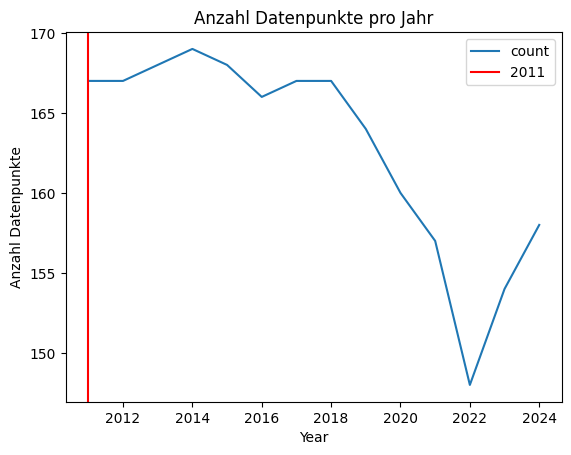

In [161]:
g = df['Year'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=2011, color='red',label='2011') 
g.legend()

### 3.4 Analyse Codes

In [53]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  169


In [54]:
df['Code'].value_counts()

Code
AFG    13
PHL    13
MNE    13
MAR    13
MMR    13
       ..
OMN     3
MDV     2
PRI     2
GUY     1
CUB     1
Name: count, Length: 168, dtype: int64

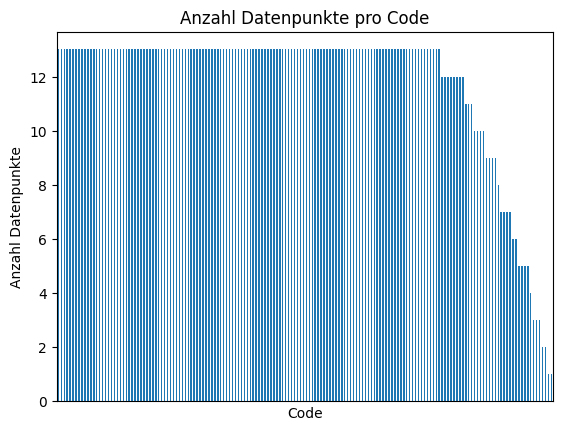

In [159]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



In [61]:
top5_countries = (
    df.groupby("Entity")["Cantril_ladder_score"]
      .max()                      
      .sort_values(ascending=False)
      .head(5)
)

print(top5_countries)

Entity
Denmark        7.856
Finland        7.842
Norway         7.655
Switzerland    7.650
Iceland        7.561
Name: Cantril_ladder_score, dtype: float64


In [80]:
top5_countries_2024 = (
    df[df["Year"] == 2024]
      .groupby("Entity")["Cantril_ladder_score"]
      .mean()
      .sort_values(ascending=False)
      .head(5)
)

print("Top 5 Länder im Jahr 2024:")
print(top5_countries_2024)


Top 5 Länder im Jahr 2024:
Entity
Finland        7.736
Denmark        7.521
Iceland        7.515
Sweden         7.345
Netherlands    7.306
Name: Cantril_ladder_score, dtype: float64


In [76]:
bottom5_countries_2024 = (
    df[df["Year"] == 2024]
      .groupby("Entity")["Cantril_ladder_score"]
      .mean()
      .sort_values(ascending=True)
      .head(5)
)
 
print("5 Länder mit der tiefsten Lebenszufriedenheit im Jahr 2024:")

print(bottom5_countries_2024)

 

5 Länder mit der tiefsten Lebenszufriedenheit im Jahr 2024:
Entity
Afghanistan     1.364
Sierra Leone    2.998
Lebanon         3.188
Malawi          3.260
Zimbabwe        3.396
Name: Cantril_ladder_score, dtype: float64


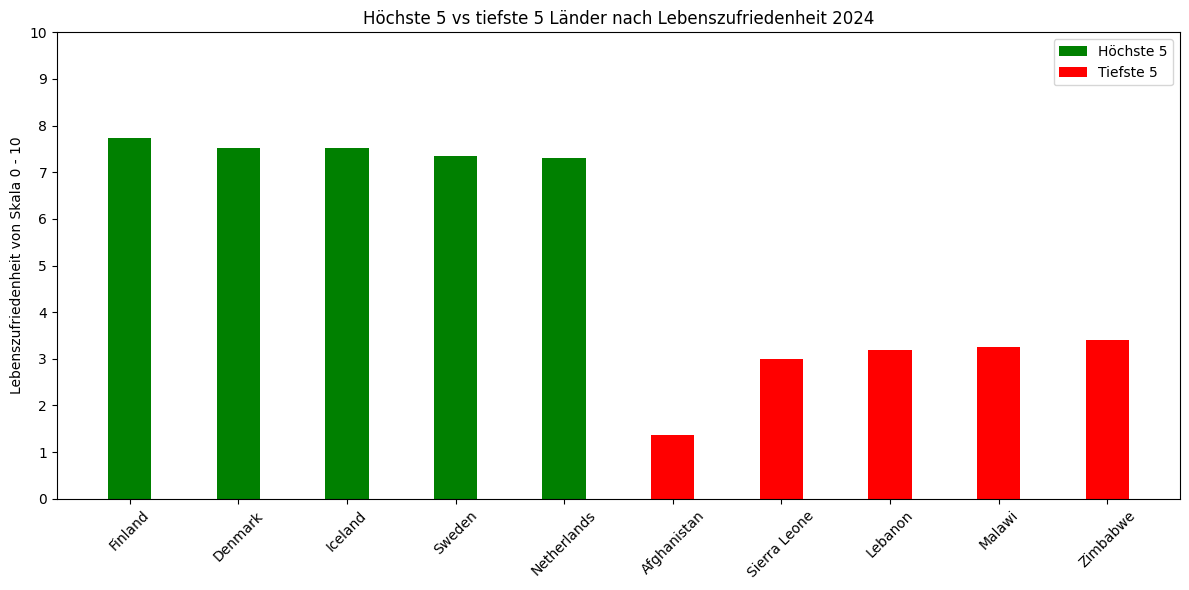

In [ ]:
# Top 5 Länder

top5 = (
    df[df["Year"] == 2024]
      .set_index("Entity")["Cantril_ladder_score"]
      .sort_values(ascending=False)
      .head(5)
)
 
# Bottom 5 Länder

bottom5 = (
    df[df["Year"] == 2024]
      .set_index("Entity")["Cantril_ladder_score"]
      .sort_values(ascending=True)
      .head(5)
)
 
# Alle Labels und Werte für den Plot

labels = list(top5.index) + list(bottom5.index)
scores = list(top5.values) + list(bottom5.values)
 
# Balken-Positionen

x = list(range(len(labels)))
 
# Balkenbreite

width = 0.4
plt.figure(figsize=(12,6))
 
# Top 5 Balken links

plt.bar(x[:5], top5.values, width, label="Höchste 5", color="green")

# Bottom 5 Balken rechts

plt.bar(x[5:], bottom5.values, width, label="Tiefste 5", color="red")
 
# Achsenbeschriftung und Titel

plt.xticks(x, labels, rotation=45)
plt.ylabel("Lebenszufriedenheit von Skala 0 - 10")
plt.title("Höchste 5 vs tiefste 5 Länder nach Lebenszufriedenheit 2024")
plt.ylim(0, 10) # Y-Achse von 0 bis 10
plt.yticks(range(0, 11)) # Ganze Zahlen 0,1,2,...,10
plt.legend()
plt.tight_layout()
plt.show()

In [92]:
top5_countries_2011 = (
    df[df["Year"] == 2011]
      .groupby("Entity")["Cantril_ladder_score"]
      .mean()
      .sort_values(ascending=False)
      .head(5)
)

print("Top 5 Länder im Jahr 2011:")
print(top5_countries_2011)

Top 5 Länder im Jahr 2011:
Entity
Denmark        7.856
Finland        7.579
Norway         7.524
Netherlands    7.512
Switzerland    7.499
Name: Cantril_ladder_score, dtype: float64


In [93]:
bottom5_countries_2011 = (
    df[df["Year"] == 2011]
      .groupby("Entity")["Cantril_ladder_score"]
      .mean()
      .sort_values(ascending=True)
      .head(5)
)
 
print("5 Länder mit der tiefsten Lebenszufriedenheit im Jahr 2011:")

print(bottom5_countries_2011)

5 Länder mit der tiefsten Lebenszufriedenheit im Jahr 2011:
Entity
Togo                        3.007
Benin                       3.493
Central African Republic    3.568
Sierra Leone                3.586
Burundi                     3.678
Name: Cantril_ladder_score, dtype: float64


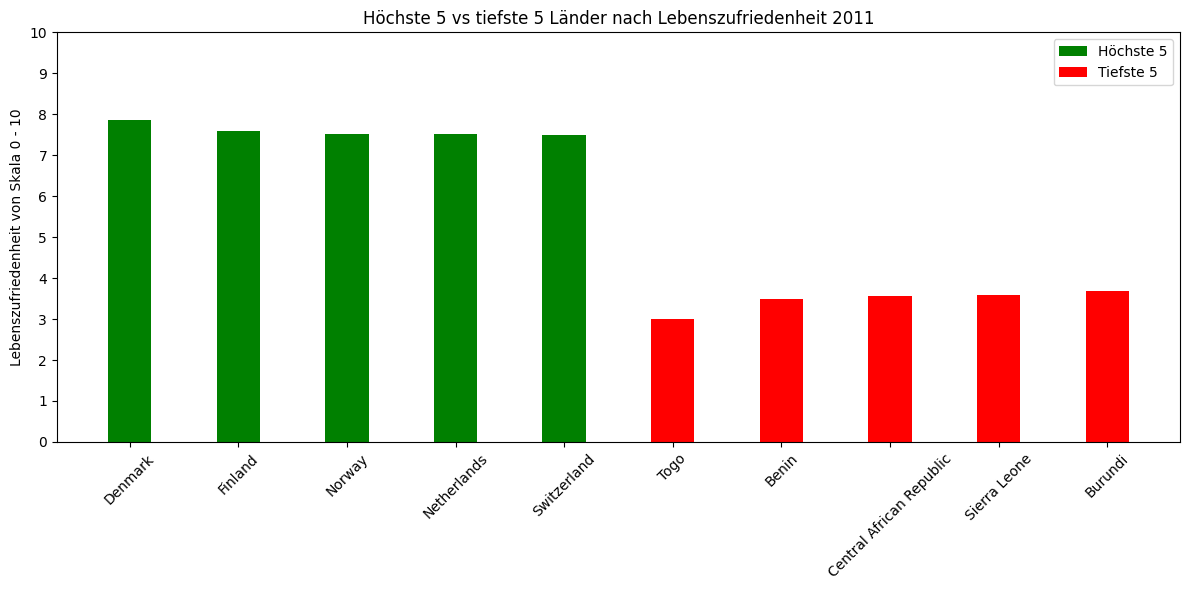

In [122]:
# Top 5 Länder

top5 = (
    df[df["Year"] == 2011]
      .set_index("Entity")["Cantril_ladder_score"]
      .sort_values(ascending=False)
      .head(5)
)
 
# Bottom 5 Länder

bottom5 = (
    df[df["Year"] == 2011]
      .set_index("Entity")["Cantril_ladder_score"]
      .sort_values(ascending=True)
      .head(5)
)
 
# Alle Labels und Werte für den Plot

labels = list(top5.index) + list(bottom5.index)
scores = list(top5.values) + list(bottom5.values)
 
# Balken-Positionen

x = list(range(len(labels)))
 
# Balkenbreite

width = 0.4
plt.figure(figsize=(12,6))
 
# Top 5 Balken links

plt.bar(x[:5], top5.values, width, label="Höchste 5", color="green")

# Bottom 5 Balken rechts

plt.bar(x[5:], bottom5.values, width, label="Tiefste 5", color="red")
 
# Achsenbeschriftung und Titel

plt.xticks(x, labels, rotation=45)
plt.ylabel("Lebenszufriedenheit von Skala 0 - 10")
plt.title("Höchste 5 vs tiefste 5 Länder nach Lebenszufriedenheit 2011")
plt.ylim(0, 10) # Y-Achse von 0 bis 10
plt.yticks(range(0, 11)) # Ganze Zahlen 0,1,2,...,10
plt.legend()
plt.tight_layout()
plt.show()

In [97]:
# Liste der Kontinente wie in euren Daten
continents = ["North America", "South America", "Africa", "Europe", "Asia", "Oceania"]
 
# Daten für 2011 filtern
df_2011 = df[df["Year"] == 2011]
 
# Nur Zeilen, die Kontinente repräsentieren
df_continents_2011 = df_2011[df_2011["Entity"].isin(continents)]
 
# Durchschnitt pro Kontinent (hier eigentlich jeder Eintrag ist ein Kontinent)
avg_by_continent = df_continents_2011.set_index("Entity")["Cantril_ladder_score"]
 
print("Lebenszufriedenheit pro Kontinent (2011):")
print(avg_by_continent)

Lebenszufriedenheit pro Kontinent (2011):
Entity
Africa           4.453846
Asia             4.982614
Europe           6.129434
North America    6.923755
Oceania          7.349405
South America    6.371585
Name: Cantril_ladder_score, dtype: float64


In [102]:
# Liste der Kontinente wie in euren Daten
continents = ["North America", "South America", "Africa", "Europe", "Asia", "Oceania"]
 
# Daten für 2024 filtern
df_2024 = df[df["Year"] == 2024]
 
# Nur Zeilen, die Kontinente repräsentieren
df_continents_2024 = df_2024[df_2024["Entity"].isin(continents)]
 
# Durchschnitt pro Kontinent (hier eigentlich jeder Eintrag ist ein Kontinent)
avg_by_continent = df_continents_2024.set_index("Entity")["Cantril_ladder_score"]
 
print("Lebenszufriedenheit pro Kontinent (2024):")
print(avg_by_continent)

Lebenszufriedenheit pro Kontinent (2024):
Entity
Africa           4.390820
Asia             5.190590
Europe           6.388318
North America    6.732753
Oceania          6.970407
South America    6.277881
Name: Cantril_ladder_score, dtype: float64


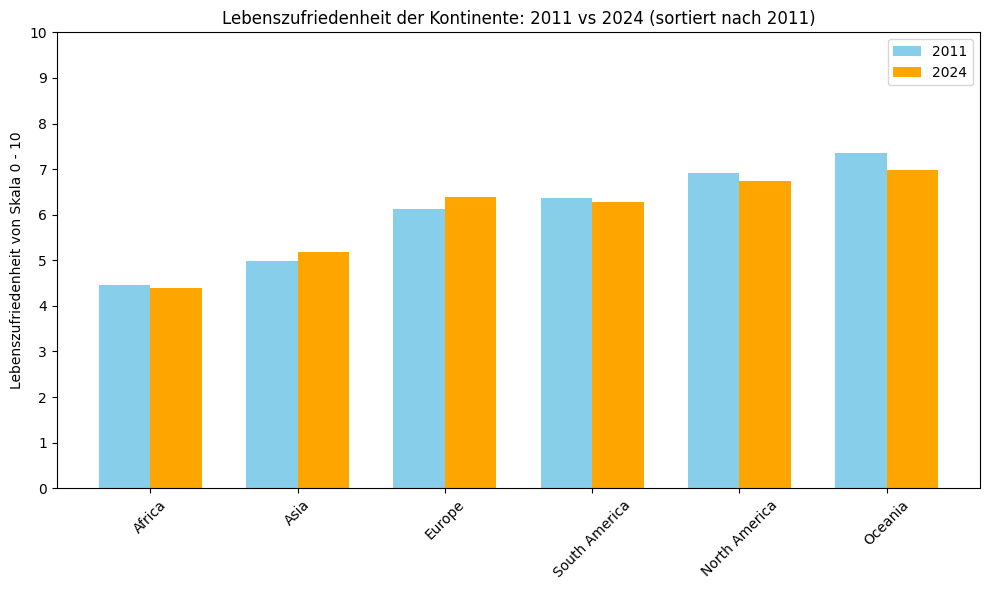

In [125]:
# Kontinente
continents = ["North America", "South America", "Africa", "Europe", "Asia", "Oceania"]
 
# Werte für 2011
df_2011 = df[df["Year"] == 2011]
values_2011 = df_2011[df_2011["Entity"].isin(continents)].set_index("Entity")["Cantril_ladder_score"]
 
# Werte für 2024
df_2024 = df[df["Year"] == 2024]
values_2024 = df_2024[df_2024["Entity"].isin(continents)].set_index("Entity")["Cantril_ladder_score"]
 
# Sortieren nach Werten 2011
values_2011 = values_2011.sort_values()  # aufsteigend: tiefste -> höchste
values_2024 = values_2024[values_2011.index]  # Reihenfolge an 2011 anpassen
 
# Balkenbreite
width = 0.35
x = range(len(values_2011))
 
# Plot erstellen
plt.figure(figsize=(10,6))
plt.bar([i - width/2 for i in x], values_2011.values, width, label="2011", color="skyblue")
plt.bar([i + width/2 for i in x], values_2024.values, width, label="2024", color="orange")
 
# Achsen und Titel
plt.xticks(x, values_2011.index, rotation=45)
plt.ylabel("Lebenszufriedenheit von Skala 0 - 10")
plt.title("Lebenszufriedenheit der Kontinente: 2011 vs 2024 (sortiert nach 2011)")
plt.ylim(0, 10)  # Y-Achse von 0 bis 10
plt.yticks(range(0, 11))  # Ganze Zahlen 0,1,2,...,10
plt.legend()
plt.tight_layout()
plt.show()
 

In [137]:
# Pivot-Tabelle: Kontinent x Jahr
table = df[df["Entity"].isin(continents)].pivot(index="Entity", columns="Year", values="Cantril_ladder_score")
print(table)
 

Year               2011      2012      2014      2015      2016      2017  \
Entity                                                                      
Africa         4.453846  4.618466  4.476437  4.397037  4.460210  4.449756   
Asia           4.982614  5.031361  5.007458  4.981026  4.974973  4.918314   
Europe         6.129434  6.088926  6.100986  6.137458  6.165313  6.179685   
North America  6.923755  6.914968  6.959360  6.860802  6.744117  6.671660   
Oceania        7.349405  7.329126  7.284322  7.316392  7.288870  7.280471   
South America  6.371585  6.605793  6.677414  6.604779  6.361448  6.176329   

Year               2018      2019      2020      2021      2022      2023  \
Entity                                                                      
Africa         4.517125  4.463035  4.553698  4.519978  4.428142  4.386864   
Asia           4.849117  4.731296  4.843564  4.889135  5.004606  5.078239   
Europe         6.240796  6.301991  6.337145  6.339464  6.357478  6.344568  

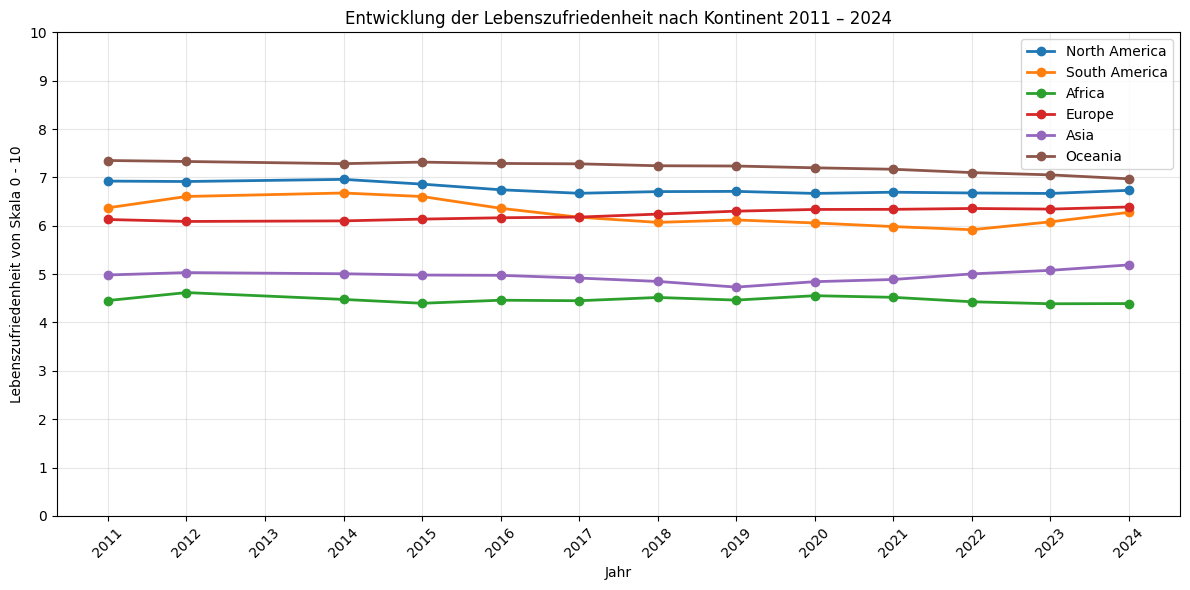

In [138]:
# Kontinente

continents = ["North America", "South America", "Africa", "Europe", "Asia", "Oceania"]
 
# Farben pro Kontinent

colors = {

    "North America": "#1f77b4",  # blau
    "South America": "#ff7f0e",  # orange
    "Africa": "#2ca02c",          # grün
    "Europe": "#d62728",          # rot
    "Asia": "#9467bd",            # lila
    "Oceania": "#8c564b"          # braun

}
 
plt.figure(figsize=(12,6))
 
# Für jeden Kontinent Linie zeichnen

for cont in continents:

    df_cont = df[df["Entity"] == cont].sort_values("Year")

    plt.plot(
        df_cont["Year"],
        df_cont["Cantril_ladder_score"],
        marker="o",
        label=cont,
        color=colors[cont],
        linewidth=2

    )
 
# Achsen, Titel, Legende

plt.xlabel("Jahr")
plt.ylabel("Lebenszufriedenheit von Skala 0 - 10")
plt.title("Entwicklung der Lebenszufriedenheit nach Kontinent 2011 – 2024")
plt.ylim(0, 10)  # Y-Achse von 0 bis 10
plt.yticks(range(0, 11))  # Ganze Zahlen 0,1,2,...,10
plt.xticks(range(2011, 2025, 1), rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

 

In [115]:
for jahr, wert in schweiz_jahresdaten:
    print(f"{jahr}: {wert}")

2011: 7.499
2012: 7.65
2014: 7.587
2015: 7.509
2016: 7.494
2017: 7.487
2018: 7.48
2019: 7.5599
2020: 7.571
2021: 7.512
2022: 7.24
2023: 7.06
2024: 6.935


/var/folders/2z/_jn8f_pn7_s9sb_963jv_ygm0000gn/T/ipykernel_27746/3438773554.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


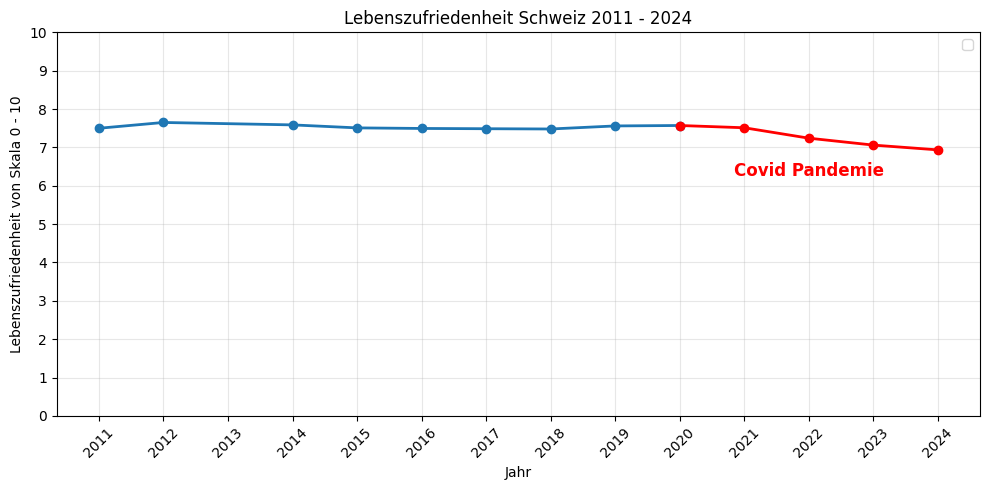

In [149]:
# Daten für die Schweiz
df_switzerland = df[df["Entity"] == "Switzerland"].sort_values("Year")
years = df_switzerland["Year"].tolist()
values = df_switzerland["Cantril_ladder_score"].tolist()
 
plt.figure(figsize=(10,5))
 
# Linie bis 2020 (blau)
idx_2020 = years.index(2020)
plt.plot(years[:idx_2020+1], values[:idx_2020+1],
         marker="o", color="#1f77b4", linewidth=2)
 
# Linie Abstieg 2020-2024 (rot)
plt.plot(years[idx_2020:], values[idx_2020:],
         marker="o", color="red", linewidth=2)
 
# Beschriftung "Covid Pandemie" oberhalb des roten Abschnitts
mid_year = (years[idx_2020] + years[-1]) / 2
mid_value = (values[idx_2020] + values[-1]) / 2
plt.text(mid_year, mid_value - 1, "Covid Pandemie", color="red", 
         fontsize=12, fontweight="bold", ha="center")
 
# x-Achse
plt.xticks(range(2011, 2025, 1), rotation=45)
 
# y-Achse von 0 bis 10 mit 0.05-Schritten
yticks = [i * 1 for i in range(0, 201)]
plt.yticks(yticks)
plt.ylim(0, 10)
 
# Achsen, Titel, Grid
plt.xlabel("Jahr")
plt.ylabel("Lebenszufriedenheit von Skala 0 - 10")
plt.title("Lebenszufriedenheit Schweiz 2011 - 2024")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()